# Регуляризация в Scikit-Learn
Механизм, который помогает решить несколько общих проблем машинного обучения, применяя:
* Минимизацию сложности модели
* Штрафы на функцию потерь
* Уменьшая переобученность модели(добавляя больше смещения, чтобы уменьшить дисперсию)

Регуляризация - это уменьшение переобученности модели: она требует добавления смещения, а также поиска оптимального значения гиперпараметра для штрафа.

Три основных типа регуляризации:
1) L1-регуляризация - регрессия LASSO
2) L2-регуляризация - регрессия RIDGE
3) Комбинация L1 и L2 - Elastic Net

## L1-регуляризация - регрессия LASSO
L1-регуляризация добавляет штраф, равный абсолютному значению величин коэффициентов:
* Ограничивает размер коэффициентов
* Может создавать разреженные модели, в которых некоторые коэффициенты становятся нулями

Если посмотреть на математическую формулу, то когда мы минимизируем функцию стоимости по коэффициентам $\beta$, то L1-регуляризация добавляет в эту формулу ещё одно слагаемое - это сумма абсолютных значений коэффициентов $\beta$: $$\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_jx_{ij})^2 + \lambda\sum_{j=1}^{p} |\beta_j| = RSS + \lambda\sum_{j=1}^{p} |\beta_j|$$
Здесь $\lambda$ - это гиперпараметр, который можно настраивать.

LASSO может приравнивать некоторые коэффициенты в точности нулю, когда параметр альфа достаточно большой. По сути, LASSO выбирает из всего набора признаков, только некоторые значимые, а остальные отбрасываются. Модели, которые получаются в результате работы LASSO, обычно легче интерпретировать.

## L2-регуляризация - регрессия RIDGE
L2-регуляризация добавляет штраф, равный квадрату величин коэффициентов:
* Все коэффициенты уменьшаются на один порядок
* Вовсе не обязательно обнуляет коэффициенты

Мы минимизируем следующую формулу:$$\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_jx_{ij})^2 + \lambda\sum_{j=1}^{p} \beta_j^2 = RSS + \lambda\sum_{j=1}^{p} \beta_j^2$$

Здесь $\lambda$ - это гиперпараметр, который отвечает за то, насколько большой или маленький штраф будет добавлен

**Ridge-регрессия** - это метод регуляризации, позволяющий снизить вероятность переобучения модели на обучающем наборе данных. Это достигается добавлением штрафующего слагаемого к ошибке, с квадратом значений коэффициентов.

На примере для одного признака X и целевой переменной y:

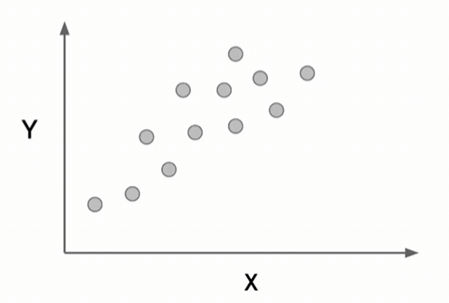

Разобьем все точки на обучающие(розовые точки) и тестовые(синие точки) наборы:

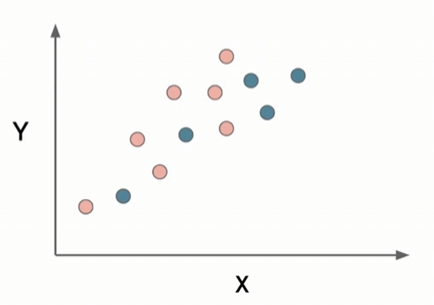

Возьмем только обучающий набор данных. Мы будем находить коэффициенты $\beta_1$ и $\beta_0$ в уравнении линейной регрессии $\hat{y} = \beta_1x + \beta_0$. Эта формула выглядит одинаково как для линейной так и для ридж-регрессии, т.к. мы ищем коэффициенты $\beta$, просто минимизируем немного разные выражения.

Представим, что мы минимизируем только сумму квадратов ошибок. В итоге мы получаем некоторые коэффициенты $\beta$.

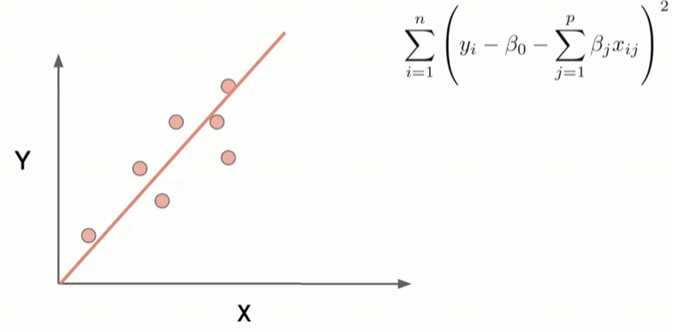

В данном примере модель получилась переобученной:

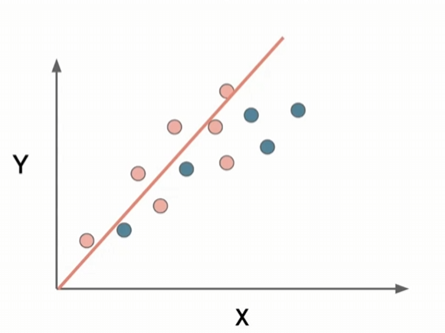

Можно ли добавить немного смещения, чтобы заметно уменьшить дисперсию? Мы хотим получить новую синюю линию, которая будет лучше обобщаться на новые данные, причем она добавляет только смещение, т.к. она не так хорошо работает на обучающих данных, но мы надеемся, что в целом модль будет работать лучше:

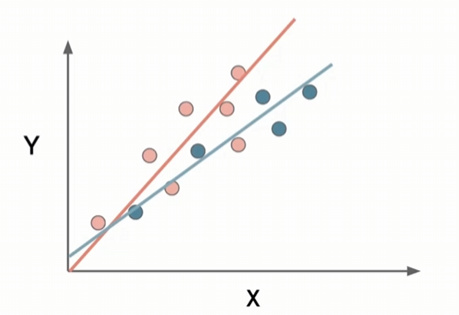

Для этого мы будем минимизировать сумму квадратов ошибок и слагаемое штрафа, для простоты предположим что $\lambda = 1$(в sklearn $\lambda$ называется $\alpha$). Мы штрафуем большой наклон линии $\hat{y} = \beta_1x + \beta_0$. К этому приводит дополнительная минимизация $\beta_1^2$, так как $\beta_1$ - отвечает за наклон линии. Даже небольшие увеличения $\beta_1$ увеличивают то значение штрафа, которое мы минимизируем.

Параметр $\lambda$ как раз влияет на то, насколько сильно мы учитываем влияние $\beta_1^2$ на общее выражение.

В итоге для случая одного признака мы получаем меньший наклон линии, она показывает немного худший результат на обучающем наборе, но лучше обобщается на новые данные.

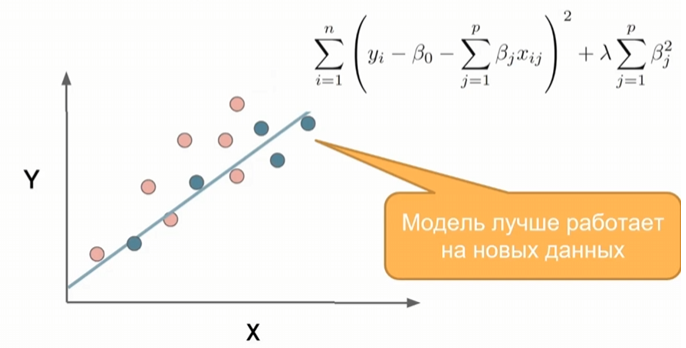

**Как сильно необходимо наказывать большие значения бетта?** Можно с помощью кросс-валидации попробовать разные значения $\lambda$($\alpha$) и выбрать оптимальный вариант(при котором мы будем лучше минимизировать какую-либо метрику MAE или MSE).

## Комбинация L1 и L2 - Elastic Net
Elastic Net комбинирует L1 и L2, определяя соотношение между ними с помощью параметра $\alpha$:
$$\frac{\sum_{i=1}^{n} (y_i - x_i^J\hat{\beta})^2}{2n} + \lambda(\frac{1-\alpha}{2} \sum_{j=1}^{m} \hat{\beta_j^2} + \alpha\sum_{j=1}^{m} \hat{|\beta_j|})$$

Если $\alpha = 0$, то формула будет содержать компоненту только для L2. Если $\alpha = 1$, то формула будет содержать компоненту только для L1.

Эти методы регуляризации имеют накладные расходы:
* Добавляется ещё один гиперпараметр, который необходимо оптимизировать
* Мультипликатор для штрафа определяет "силу" этого штрафа

# Масштабирование признаков(Feature Scaling)
Масштабирование признаков является очень полезным для процессов машинного обучения. Для некоторых алгоритмов, измеряющих расстояние между точками(например, KNN) - масштабирование обязательно для получения хороших результатов.

Масштабирование признаков улучшает сходимость итераций для алгоритмов, которые зависят от масштаба признаков(например, такие алгоритмы для которых применяется градиентный спуск). Если признаки имеют разный масштаб, то одни веса(weights) могут обновляться быстрее других, поскольку сами значения признаков участвуют в обновлении весов.

**Некоторые алгоритмы не зависят от масштаба признаков - например, алгоритмы на основе деревьев классификации и регрессии.**

Сведение различных признаков к единой шкале позволяет сравнивать признаки, имеющие разные единицы измерения. Это позволяет напрямую сравнивать разные коэффициенты модели между собой.

**При масштабировании признаков важно помнить:**
* Если масштабирование признаков было выполнено перед обучением модели - новые данные должны быть смасштабированы перед тем, как добавлять их в модель
* Масштабирование влияет на интерпретацию коэффициентов - легче сравнивать коэффициенты между собой, но сложнее масштабироваться обратно на исходные шкалы

Масштабирование признаков может заметно повысить производительность работы алгоритмов.

Два основных способа масштабирования:
1) Стандартизация или Z-score normalization (данные должны получить среднее значение $\mu = 0$ и среднеквадратическое отклонение $\sigma = 1$, т.е. мы приближаем данные к стандартному нормальному распределению(**мы можем получить отрицательные значения признаков**))$$X_{changed} = \frac{X - \mu}{\sigma}$$
2) Нормализация (данные должны оказаться в диапазоне от 0 до 1)$$X_{changed} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

## Вызовы методов `.fit()` и `.transform()` с точки зрения масштабирования данных
Метод `.fit()` - вычисляет нужные метрики - $X_{min}, X_{max}$, среднее значение, дисперсия и т.д. Он выполняет только подготовительную работу, но не трансформацию данных.    
Метод `.transform()` - масштабирует данные и возвращает новую версию данных.

**Важные моменты:**
1) Метод `.fit()` нужно вызывать только для обучающих данных, т.е. вычисление статистической информации должно выполняться только на обучающих данных. Не нужно добавлять в модель какие-то знания, которые содержатся в тестовых данных.
2) Если использовать все данные, то произойдёт **"утечка данных"** - вычисление статистик на полном наборе данных приведёт к тому, что некоторые крупицы информации из тестовых данных перетекут в обучающие данные во время трансформации `.transform()`

Процесс масштабирования признаков:
1) Разбиваем данные на обучающий и тестовый наборы
2) Вызываем `.fit()` только для обучающих данных
3) Вызываем `.transform()` для обучающих данных
4) Вызываем `.transform()` для тестовых данных

Нужно ли масштабировать целевую переменную?
* В общем случае это не требуется
* Нормализуя распределение на выходе, мы меняем определение целевой переменной - это будет отличаться от того, что мы пытаемся предсказывать

# Кросс-валидация(перекрёстная проверка)
Когда мы делаем простое разбиение, то теряем возможность отлаживать гиперпараметры модели на всём объёме данных. **Кросс-валидация** - это набор более продвинутых методов для разбиения данных на обучающий и тестовый наборы.

Можно ли как-то сделать следующее:
1) Обучать модель на всех данных
2) Проверять модель на всех данных

Это можно сделать с помощью кросс-валидации.

Для данных на рисунке ниже:

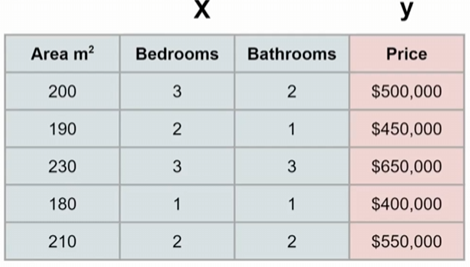

Выбран отдельный цвет для признаков и отдельный цвет для целевой переменной.

Разобьём данные на обучающий и тестовый наборы следующим образом:

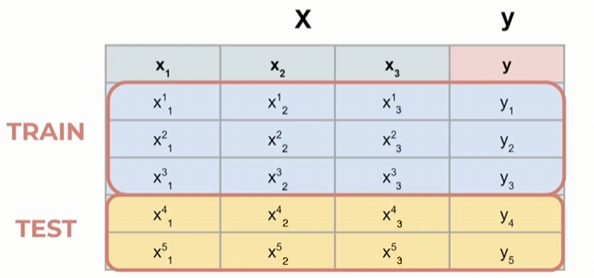

Для наглядности повернём данные и поменяем размер данных:

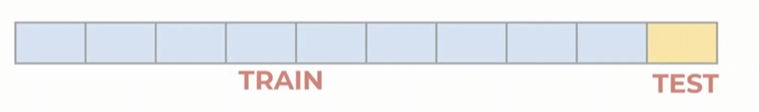

Это те же самые данные разбитые на обучающие и тестовые наборы, в каждом из которых есть как признаки, так и целевая переменная.

Сделаем шаг назад, чтобы посмотреть как работает кросс-валидация

* Разбиваем все данные на k-частей
* 1/k часть всех данных отводим на тестовый набор:

 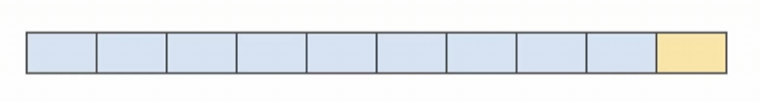

* После этого выполняем обучение модели и вычисляем метрики:

 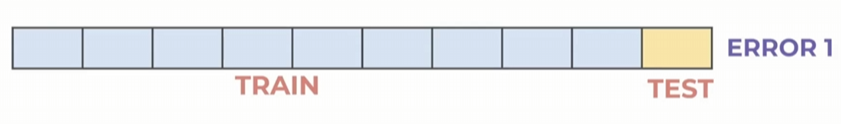

* Повторяем процесс, но уже для другого разбиения:

 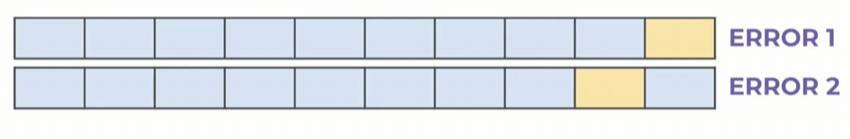

* Повторяем для всех возможных разбиений:

 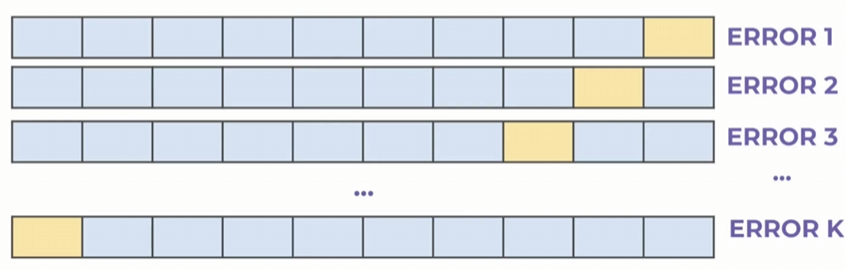

**Таким образом, получилось, что мы обучали и тестировали модель на всем наборе данных.** В конце можно усредний ошибки по всем итерациям, для получения средней ошибки - она более точно оценит работу модели, потому что в обучении и тестировании поучаствовали все данные.

**Возможные минусы:** мы повторяем вычисления K раз! Это может быть заметно для сложных алгоритмов и больших наборов данных. Обычно выбирают K=10, т.е. тестовый набор 10% Максимально возможное K = количеству строк в датафрейме, т.е. в тестовый набор берется одна строка, а все остальные идут в обучающий.

Также имеет место вопрос - когда мы используем все данные для подбора гиперпараметров, корректно ли мы оцениваем метрики работы модели? Как можно понять работу модели на данных, которые модель никогда не видела при обучении и при подборе гиперпараметров?

Для этого можно отложить в сторону часть данных - **"hold-out" test set**. Этот шаг выполняется в дополнение к разбиению данных на тренировочную и тестовую выборки.

**Подробнее про процесс:**
* В самом начале отделяем часть данных - эти данные будут называться "hold-out" test set, их модель не увидит ни при обучении, ни при настройке гиперпараметров:


  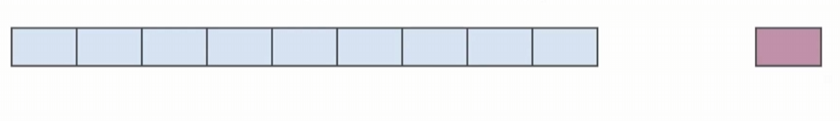

* Далее мы делаем классические разбиение на тренировочные и тестовые данные:

  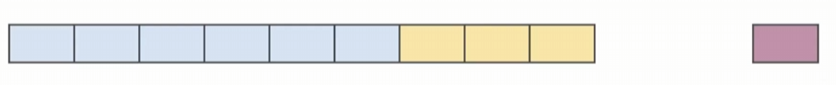

* Обучение/тюнинг только на этих данных и настройка гипер-параметров:

  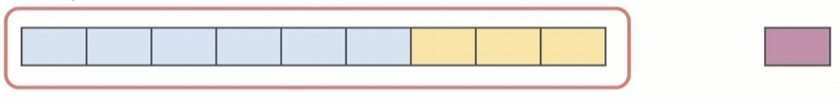

* Либо то же самое для кросс-валидации:

  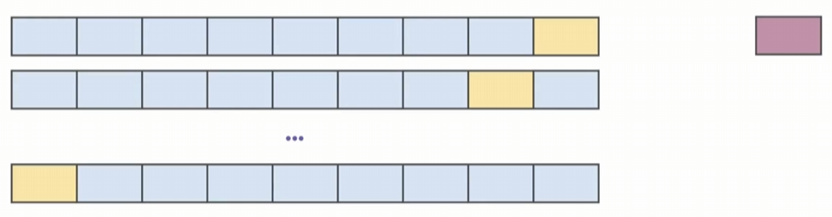

* После обучения/тюнинга выполняется финальная проверка на данных "hold-out", **после этого уже нельзя продолжать настройку параметров модели!** 

### Разбиение "Train - Validation - Test"
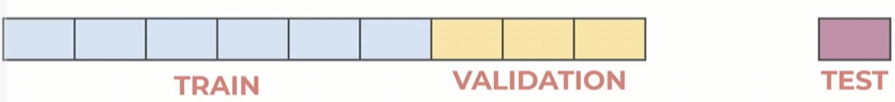

В конце мы получаем финальную метрику для оценки модели, после чего нельзя возвращаться к настройке модели.

# Реализация

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
X = df.drop('sales', axis=1)

In [11]:
y = df['sales']

## Полиномиальная конвертация
Создание полиномов похоже на создание новых признаков. Этот шаг не обязателен для регуляризации

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [20]:
poly_features = polynomial_converter.fit_transform(X)

In [22]:
poly_features.shape

(200, 19)

## Разбиение на обучающий и тестовый наборы

In [24]:
from sklearn.model_selection import train_test_split

Указываем **poly_features** чтобы использовать 19 признаков

In [26]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

## Масштабирование данных
Хотя в наших данных все признаки имеют один и тот же порядок величины (в $1000 долларов), это не всегда верно в других наборах данных. Поскольку математика регуляризации будет суммировать коэффициенты, очень важно стандартизировать признаки.

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

**Важно: чтобы не допустить утечки данных из тестового набора, среднее значение будет вычисляться только на обучающем наборе данных!**

In [32]:
scaler.fit(X_train)

StandardScaler()

**После этого можно вызвать метод `.transform()` для преобразования данных.** Мы сохраним данные в ту же самую переменную, но можно создать и новую

In [34]:
X_train = scaler.transform(X_train)

**Теперь повторим процесс для обучающего набора данных.** Мы обучаем модель на смасштабированных обучающих данных. То есть, сначала обучающие данные масштабируются. И лишь затем подаются на вход в модель, для обучения.

В итоге модель ожидает, что на вход в неё будут подаваться уже смасштабированные данные. Поэтому и тестовые данные, и затем абсолютно новые данные тоже нужно масштабировать - перед тем, как подавать их на вход в модель.

In [36]:
X_test = scaler.transform(X_test)

Значения признаков в **poly_features**

In [38]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

Те же значения признаков, но уже смасштабированные.

In [40]:
X_train[0]

array([ 1.53003874, -0.8862929 , -1.16598019,  1.93705409, -0.22476356,
       -0.62651363, -0.90793157, -0.850692  , -0.81317305,  2.23096225,
        0.10749852, -0.35876444, -0.61820397, -0.60530328, -0.5751799 ,
       -0.81381745, -0.72447935, -0.64260728, -0.56741817])

## Гребневая регрессия (Ridge Regression)

**Важно: в sklearn параметр $\lambda$ называется $\alpha$ для унификации, по причине того, что именно так называется параметр для целого ряда различных классов и методов, т.е. не придется запоминать как именно называется параметр для той или иной модели.**

**Для метрик кросс-валидации sklearn использует объект `scorer` для выбора наилучших значений параметра. Этот объект представляет собой ту или иную метрику(MAE, MSE и т.д.). Все эти метрики устроены по единому универсальному принципу, что бОльшие результирующие значения лучше, чем меньшие. Например для метрики точности *accuracy*, то чем больше ее значение - тем лучше, однако для метрики *RMSE*, наоборот - чем больше значение, тем хуже. Поэтому, чтобы сделать все метрики универсальными для всех моделей и задач, в sklearn для метрики *RMSE* в объекте `scorer` используется отрицательное значение метрики. Это же относится к параметру $\alpha$.**

In [42]:
from sklearn.linear_model import Ridge

In [44]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Constant that multiplies the L2 term, controlling regula

In [46]:
ridge_model = Ridge(alpha=10)

In [48]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [49]:
test_predictions = ridge_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.6296591346758599

In [56]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.891632754171089

Какова точность на обучающей выборке?

In [58]:
# Производительность на обучающем наборе
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train, train_predictions)
MAE

0.5230070613645763

**Вопрос: как узнать, что значение alpha=10 является наилучшим? Нужно сравнить его с какими-то другими значениями alpha с помощью кросс-валидации.**

## Выбираем значение alpha с помощью кросс-валидации

`RidgeCV` - выполнит кросс-валидацию для различных значений alpha и выберет наилучшее из них по некоторой метрике. 

Для параметра `cv` значение по умолчанию `None` - означает Leave-One-Out cross-validation, тот случай когда в тестовый набор попадает только одна строка, а все остальные строки участвуют в обучении модели. Это происходит по очереди для всех строк, на каждой итерации в тестовый набор попадает очередная одна строка. Для больших объемов данных - это слишком долго, поэтому можно указать некоторое число *k* - на сколько частей разбивать данные для кросс-валидации.

In [60]:
from sklearn.linear_model import RidgeCV

In [62]:
# Попробуем три разных значения alpha
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [64]:
# Для настройки гиперпараметров используем ТОЛЬКО X_train и y_train 
# это будет train и validation
# В нашем случае X_test и y_test - это Hold-out test set
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

Узнаем какое из значений alpha было лучшим

In [66]:
ridge_cv_model.alpha_

0.1

По какой метрике выбирается наилучший вариант alpha?

In [68]:
from sklearn.metrics._scorer import _SCORERS

In [70]:
_SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'd2_absolute_error_score', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'reca

Все эти метрики устроены по принципу - чем больше значение, тем лучше.

**Важно: далеко не все эти метрики применимы для задач регрессии!**

Вычислим метрики для alpha = 0.1

In [72]:
test_predictions = ridge_cv_model.predict(X_test)

In [74]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4667124113123936

In [76]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.5945136671806206

Эти метрики были вычислены на наборе данных y_test, т.е. в данном случае эти данные представляют собой Hold-out test set.

In [78]:
ridge_cv_model.coef_

array([ 5.90523815,  0.46316396,  0.68028713, -6.17743395,  3.73671928,
       -1.40708382,  0.00624704,  0.11128917, -0.2617823 ,  2.17135744,
       -0.51480159,  0.70587211,  0.60311504, -0.53271216,  0.5716495 ,
       -0.34685826,  0.36744388, -0.03938079, -0.12192939])

**Важно: для L2-регуляризации все коэффициенты не равны нулю.** Для L1-регуляризации мы будет наблюдать другую картину.

**Как можно узнать наилучшее значение метрики, выбранной нами.** Это наилучшее значение на отдельных шагах кросс-валидации. Эта метрика вычисляется для разных разбиений во время кросс-валидации, а затем усредняются все эти ошибки по всем разбиениям.

In [80]:
ridge_cv_model.best_score_

-0.3977560291681546

## LASSO - регрессия
LASSO - Least absolute shrinkage and selection operator. 

С помощью параметра `n_alphas` - указываем количество значений *alpha* в том диапазоне, который определяется с помощью параметра `eps`. При этом `eps` - это соотношение между минимальным и максимальным значениями *alpha*. Чем меньше будет значение параметра `eps`, тем больший диапазон будет обрабатываться. По сути - это такой способ указать ширину диапазона для значений *alpha* при этом сами значения(минимальное, максимальное) sklearn определяет автоматически. Мы просто накладываем ограничение на ширину диапазона, т.е. размах между минимальным и максимальным значением. 

Параметр `alphas` - позволяет явно задать нужный набор значений *alpha*.

Параметр `cv` - количество разбиений данных для кросс-валидации. Значение по умолчанию `None` - разбивает данные на пять частей.

Альфа - это гиперпараметр модели, и нужно найти его наилучшее значение с точки зрения некоторой метрики score. А кросс-валидация - это способ оценить, насколько то или иное значение альфа хорошее, но не просто на обучающем наборе данных, а выполняя разбиение всех данных (бОльшего объёма) на К частей.

Кросс-валидация нужна для увеличения объёма тренировочных данных, чтобы более точно определить параметр альфа. Кроме того, кросс-валидация нужна ещё для того, чтобы лучше понять работу модели на различных разбиениях данных. Иногда бывает так, что какое-то разбиение "удачное", и если мы просто разбиваем данные на обучающий и тестовый наборы (без кросс-валидации), то при таком "удачном" разбиении мы можем сделать неверные выводы о качестве работы модели. Если же сделать разбиение на К частей, то такое удачное разбиение будет лишь одним из нескольких разбиений. И мы получим лучшее представление о том, как работает модель на различных данных. 

Взаимодействие альфа и кросс-валидации работает следующим образом. LassoCV определяет диапазон значений alpha для проверки (спектр значений которого определяется параметрами eps и max_iter). И начинает итерации по поиску оптимального значения. На каждой итерации берётся очередное значение альфа. Для него выполняется кросс-валидация - разбиение данных на К частей. Подсчитывается метрика score для каждого разбиения, затем усредняется по всем разбиениям - получаем метрику score для того или иного значения альфа. Далее перебираем различные значения альфа, для каждого альфа подсчитываем score, и выбираем альфа с наилучшим score.

LassoCV не сохраняет внутри себя результаты всей этой работы - что происходит на различных разбиениях. Можно посмотреть лишь итоговый результат для наилучшего значения альфа.

Если действительно понадобится копнуть глубже и посмотреть, что происходит на различных разбиениях, то можно создать свой класс Lasso и внутри него что-нибудь сохранять/выводить на экран. Это достаточно тернистый путь, но технически это возможно - вариант такого подхода приведён в этой статье (там про коэффициенты, но можно сохранять и другие данные): https://stackoverflow.com/questions/67983498/how-to-get-the-coefficients-in-lasso-regression-at-every-split-while-performing

In [82]:
from sklearn.linear_model import LassoCV

In [84]:
help(LassoCV)

Help on class LassoCV in module sklearn.linear_model._coordinate_descent:

class LassoCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Lasso linear model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  The best model is selected by cross-validation.
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=1e-3
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |  
 |  n_alphas : int, default=100
 |      Number of alphas along the regularization path.
 |  
 |  alp

In [89]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5)

In [91]:
lasso_cv_model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.572e-01, tolerance: 3.674e-01
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=5)

Предупреждение говорит о том, что поиск оптимальных значений *alpha* не достиг точки сходимости. Это можно поправить разными способами. Например увеличить параметр `max_iter`, который отвечает за количество итераций. Либо можно поменять параметры для диапазона *alpha*. Параметр `tolerance`, обычно, принято оставлять в значении по умолчанию.

In [94]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [96]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [100]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [102]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [106]:
lasso_cv_model.alpha_

0.4924531806474871

In [108]:
test_predictions = lasso_cv_model.predict(X_test)

In [110]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.6811456342837983

In [112]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.0349127365478727

In [114]:
lasso_cv_model.coef_

array([0.97675148, 0.        , 0.        , 0.        , 3.8148913 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## Elastic Net
Elastic Net сочетает в себе ридж-регрессию и лассо-регрессию, чтобы взять лучшее из обеих регуляризаций!

Параметр `l1_ratio` - это отношение между L1 и L2. Можно указать набор значений, из которых будет выбираться наилучшее.
Параметры `eps` и `n_alphas` - такие же параметры, что были рассмотрены выше для LassoCV.

In [120]:
from sklearn.linear_model import ElasticNetCV

In [122]:
help(ElasticNetCV)

Help on class ElasticNetCV in module sklearn.linear_model._coordinate_descent:

class ElasticNetCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  ElasticNetCV(*, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Elastic Net model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  Read more in the :ref:`User Guide <elastic_net>`.
 |  
 |  Parameters
 |  ----------
 |  l1_ratio : float or list of float, default=0.5
 |      Float between 0 and 1 passed to ElasticNet (scaling between
 |      l1 and l2 penalties). For ``l1_ratio = 0``
 |      the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.
 |      For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2
 |      This parameter can be a list, in which case

In [125]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [127]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [129]:
# Список всех рассмотренных значений
elastic_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [133]:
# Наилучшее значение
elastic_model.l1_ratio_

1.0

**Получается, что Ridge - был исключён, и у нас осталась чистая LASSO-регрессия**

In [137]:
elastic_model.alpha_

0.004924531806474871

In [139]:
test_predictions = elastic_model.predict(X_test)

In [141]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.5123045552899836

In [143]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

0.6308043049172903

In [145]:
# Метрика MAE на обучающем наборе
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.34771430450537827

In [147]:
elastic_model.coef_

array([ 5.15048089,  0.4274257 ,  0.29684446, -4.53337994,  3.38937185,
       -0.4288993 ,  0.        ,  0.        ,  0.        ,  1.17891049,
       -0.        ,  0.        ,  0.16706037, -0.        ,  0.        ,
        0.        ,  0.11083672,  0.        ,  0.06155549])